Entregáveis 

* Análise Descritiva de Dados 
* Planejamento e Substituição de NA 
* Lista de Hipótese

# 0. Imports and Fuctions

In [19]:
import inflection
import pandas       as pd
import numpy        as np
import seaborn      as sns



from IPython.display      import Image

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df = pd.read_csv("datas/churn.csv")

# 1. Data Describe

In [3]:
df1 = df.copy()

In [4]:
df1.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 1.1 Rename Columns

**EXPLICAÇÃO DAS COLUNAS** <br>

* RowNumber: O número da coluna
* CustomerID: Identificador único do cliente
* Surname: Sobrenome do cliente.
* CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.
* Geography: O país onde o cliente reside.
* Gender: O gênero do cliente.
* Age: A idade do cliente.
* Tenure: Número de anos que o cliente permaneceu ativo.
* Balance: Valor monetário que o cliente tem em sua conta bancária.
* NumOfProducts: O número de produtos comprado pelo cliente no banco.
* HasCrCard: Indica se o cliente possui ou não cartão de crédito.
* IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.
* EstimateSalary: Estimativa do salário mensal do cliente.
* Exited: Indica se o cliente está ou não em Churn.

In [5]:
cols_old = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure' ,'Balance', 'NumOfProducts', 
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2 Data Dimensions

In [6]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 10000
Number of Cols: 14


## 1.3 Data Types 

In [7]:
df1.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

## 1.4 Check NA

In [8]:
df1.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 1.5 Change DataTypes

In [9]:
df1['exited'] = df1['exited'].map({1: 'yes', 0: 'no'})
df1['is_active_member'] = df1['is_active_member'].map({1: 'yes', 0: 'no'})
df1['has_cr_card'] = df1['has_cr_card'].map({1: 'yes', 0: 'no'})

## 1.6 Descriptive Statistics

In [10]:
num_attributes = df1.select_dtypes(exclude='object')
cat_attributes = df1.select_dtypes(include='object')

### 1.6.1 Numerical Atributes

In [11]:
num_attributes = num_attributes.drop(columns=['row_number', 'customer_id'], axis=1) 

describe = num_attributes.describe().T

describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()

describe

,count,mean,std,min,25%,50%,75%,max,range,variation coefficient,skew,kurtosis
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00,500.00,0.148577,-0.071607,-0.425726
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00,74.00,0.269458,1.011320,1.395347
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00,10.00,0.576958,0.010991,-1.165225
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09,250898.09,0.815803,-0.141109,-1.489412
num_of_products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00,3.00,0.380117,0.745568,0.582981
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48,199980.90,0.574586,0.002085,-1.181518


**credit score** <br>
* coeficiente menor do que 15% dados homogêneos
* skew ligeiramente negativo pequena concentração para valores maiores

<br> 

**age**
* skew positivo concentração de dados para valores mais altos 
* range de 74 valores
* menor idade em 18 anos 

<br> 

**tenure**
* Número de anos médio de 5 anos 
* coeficiente de variação em 57% alta dispersão de dados 
* valor máximo 10 anos (pode ter algo limitante - começo da empresa) 

<br> 

**balance**
* coeficiente de variação muito alto 87% valores heterogêneos
* desvio padrão muito alto
* skew negativo concentração para valores mais altos
- Mostra uma discrepancia entre valores ganhos da 10000 amostras


<br> 

**num_of_products**
* dispersão dentro da média 
* máximo de produtos 4 

<br>

**estimated_salary**
* desvio padrão maior do que 50% alta dispersão de dados
* skew - baixo porém positivo tendendo a valores baixos (salários menores)


## 1.6.2 Categorical Atributes

In [12]:
cat_attributes['geography'].value_counts(normalize=True) 

France     0.5014
Germany    0.2509
Spain      0.2477
Name: geography, dtype: float64

In [13]:
cat_attributes['gender'].value_counts(normalize=True) 

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

In [14]:
cat_attributes['is_active_member'].value_counts(normalize=True) 

yes    0.5151
no     0.4849
Name: is_active_member, dtype: float64

In [15]:
cat_attributes['exited'].value_counts(normalize=True) 

no     0.7963
yes    0.2037
Name: exited, dtype: float64

**INTEPRETAÇÃO**
* 50% dos clientes moram na França 
* Gênero está quase equiparável uma diferença de quase 6 p.p para masculinos 
* 51% não movimentaram a conta bancária nos últimos 12 meses 
* 20% saíram da empresa por algum motivo -> não estão mais ativos 

# 2.  Feature Engineering e Hipóteses

In [16]:
df2 = df1.copy()

## 2.1 Mapa Mental para Hipóteses

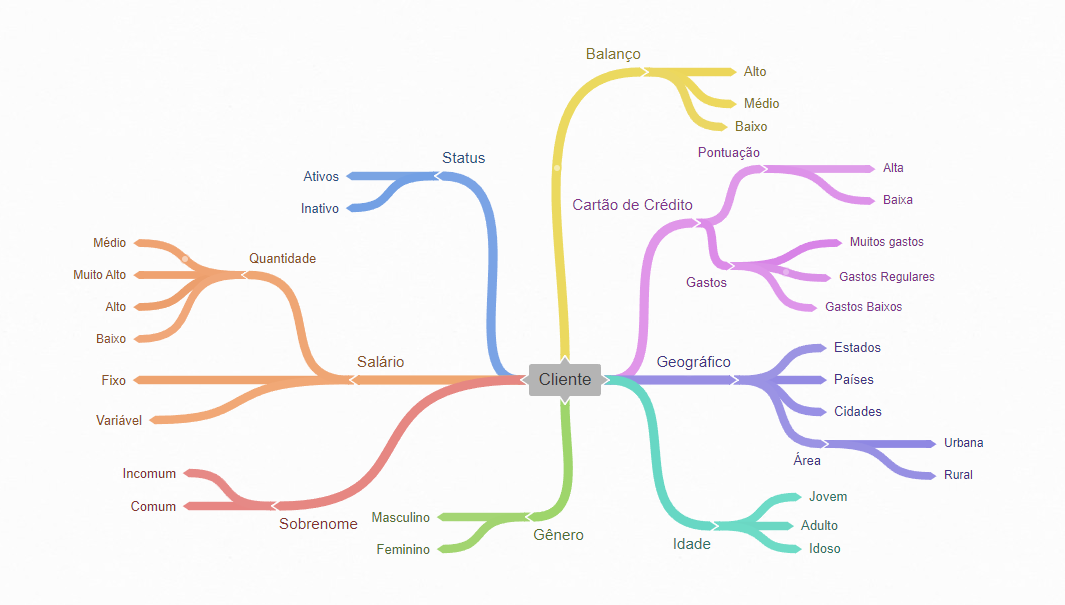

In [20]:
Image("datas/map.png") 

## 2.2 Criação de Hipótese

### 2.2.1 Hipótese Gênero

1. Mulheres desistem mais do que os homens
2. Temos mais homens ativos do que mulheres 
3. Existem mais homens idosos no churn
4. Homens com salários mais altos tem mais churn

### 2.2.2 Active Member 

1. Há mais pessoas jovens ativas do que pessoas idosas
2. Clientes ativos ganham mais 
3. Clientes ativos tem mais pontos no cartão de crédito
4. Clientes com salários mais altos são mais ativos 
5. Pessoas ativas compram mais produtos "NumOfProducts"

### 2.2.3 Credit Card

1. Pessoas mais jovens tem menor pontuação no cartão de crédito

### 2.2.4 Exited

1. Pessoas mais jovens que entram em churn.
2. Pessoas com menos crédito entram em churn
3. Pessoas que moram na Germany entram em mais churn quando comparado a Espanha
4. Pesssoas com Credit Score baixo entram em churn


## 2.3 Lista Final de Hipóteses 

**As 10 Hipóteses finais foram:**

1. Mulheres desistem mais do que os homens
2. Temos mais homens ativos do que mulheres 
3. Existem mais homens idosos no churn
4. Homens com salários mais altos tem mais churn
5. Clientes ativos ganham mais 
6. Clientes ativos tem mais pontos no cartão de crédito
7. Pessoas ativas compram mais produtos "NumOfProducts"
8. Clientes com Balance Alto tem churn mais alto
9. Pesssoas com Credit Score baixo entram em churn
10. Pessoas com menos crédito entram em churn


## 2.4 Feature Engineering 

In [29]:
#idade     (jovem, adulto, idoso)
df2["life_stage"] = df2["age"].apply( lambda x: "jovem" if x < 25 else "adulto" if (x > 25) & (x < 60) else "idoso")

In [32]:
#salários  (alto, médio, baixo)
df2["salary"] = df2["estimated_salary"].apply(lambda x: "baixo" if x < 51002.11 else "medio" if (x > 51002.11) & (x < 100193.915) else "alto" )

In [38]:
#pontuação (alta, baixa)
df2["pontuation"] = df2["credit_score"].apply(lambda x: "baixo" if x < 652.000 else "alto")

In [43]:
# balance (alto, baixo)
df2["valor"] = df2["balance"].apply(lambda x: "baixo" if x < 97198.540 else "alto")

# 3. Filtering Variables

In [44]:
df3 = df2.copy() 

## 3.1 Filtering Lines

Não é necessário

## 3.2 Filtering Columns

As colunas de row_number, customer_id, surname - são colunas sobre referência ao consumidor são indiferentes para o nosso controle de dados

In [45]:
df3 = df3.drop(columns=['row_number', 'customer_id', 'surname'], axis=1) 